In [1]:
import random
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline

In [2]:
df = pd.read_pickle('metatable_preprocessed.pkl')

In [3]:
df.head()

,filename,title,year,author,years_of_life,time_summary,time_book,name,username,tradition_country,tradition,country,year_of_birth,year_of_death,epoch,text,text_tokenized,text_pymystem_list,text_pymystem_pos_list
0,texts/ablesimov_melnik_koldun_obmanshchik_i_sv...,"Мельник — колдун, обманщик и сват",NaN,Аблесимов,1742–1783,Читается за 6 минут,40 мин,NaN,NaN,Русская литература->18 век,Русская литература,18 век,1742.0,1783.0,17.0,На краю леса перед мельницей мельник Фаддей ст...,"[на, краю, леса, перед, мельницей, мельник, фа...","[край, лес, мельница, мельник, фаддей, строгат...","[край_NOUN, лес_NOUN, мельница_NOUN, мельник_N..."
1,texts/abramov_o_chem_plachut_loshadi.txt,О чём плачут лошади,1972.0,Абрамов,1920–1983,Читается за 2 минуты,11 мин,Сергей Симиненко,siminenko,Русская литература->Советская,Русская литература,Советская,1920.0,1983.0,19.0,"Рассказчик любит лошадей, которым живётся очен...","[рассказчик, любит, лошадей, которым, живётся,...","[рассказчик, любить, лошадь, который, житься, ...","[рассказчик_NOUN, любить_VERB, лошадь_NOUN, ко..."
2,texts/abramov_alka.txt,Алька,1972.0,Абрамов,1920–1983,Читается за 6 минут,"1,5 ч",NaN,NaN,Русская литература->Советская,Русская литература,Советская,1920.0,1983.0,19.0,Лето. В последний раз главная героиня Аля Амос...,"[лето, последний, раз, главная, героиня, аля, ...","[лето, последний, главный, героиня, аля, амосо...","[лето_NOUN, последний_ADJ, главный_ADJ, героин..."
3,texts/abramov_bratja_i_sestry.txt,Братья и сёстры,1972.0,Абрамов,1920–1983,Читается за 3 минуты,7 ч,NaN,NaN,Русская литература->Советская,Русская литература,Советская,1920.0,1983.0,19.0,Пекашинский мужик Степан Андреянович Ставров с...,"[пекашинский, мужик, степан, андреянович, став...","[пекашинский, мужик, степан, андреянович, став...","[пекашинский_ADJ, мужик_NOUN, степан_NOUN, анд..."
4,texts/abe_zhencshina_v_peskah.txt,Женщина в песках,1962.0,Абэ,1924–1993,Читается за 9 минут,4 ч,В. С. Санович,sanovich,Прочая литература->Японская,Прочая литература,Японская,1924.0,1993.0,19.0,Однажды в августе человек отправляется в трехд...,"[однажды, августе, человек, отправляется, трех...","[однажды, август, человек, отправляться, трехд...","[однажды_ADV, август_NOUN, человек_NOUN, отпра..."


## Jaccard similarity

In [4]:
def jaccard_similarity(doc1, doc2):
    words_doc1 = set(doc1)
    words_doc2 = set(doc2)
    
    intersection = words_doc1.intersection(words_doc2)
    union = words_doc1.union(words_doc2)

    return len(intersection) / len(union)

In [5]:
jaccard_similarity(df.text_pymystem_list[0], df.text_pymystem_list[1])

0.05181347150259067

In [6]:
def jaccard_matrix(text_list):
    n = len(text_list)
    similarity_matr = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1):
            similarity_matr[i, j] = jaccard_similarity(text_list[i], text_list[j])
            similarity_matr[j, i] = similarity_matr[i, j]
    return similarity_matr

In [7]:
%%time

jaccard_matr = jaccard_matrix(df.text_pymystem_list)

CPU times: user 4min 39s, sys: 90.4 ms, total: 4min 39s
Wall time: 4min 39s


In [8]:
jaccard_matr.min()

0.004219409282700422

In [9]:
jaccard_matr.mean()

0.08251492576299263

In [10]:
jaccard_df = pd.DataFrame(jaccard_matr)
jaccard_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
0,1.000000,0.051813,0.084553,0.055028,0.102767,0.090286,0.097041,0.090323,0.077864,0.084615,...,0.081054,0.086587,0.082474,0.091824,0.077258,0.054176,0.093637,0.056250,0.051724,0.074336
1,0.051813,1.000000,0.048969,0.031359,0.051002,0.043609,0.042188,0.030055,0.036550,0.039007,...,0.031969,0.032609,0.035714,0.035775,0.029619,0.029851,0.034976,0.033473,0.050909,0.035821
2,0.084553,0.048969,1.000000,0.073218,0.096859,0.081540,0.096927,0.100868,0.081382,0.078981,...,0.070140,0.068333,0.082368,0.084894,0.073673,0.054054,0.089606,0.045267,0.061776,0.078014
3,0.055028,0.031359,0.073218,1.000000,0.075444,0.051059,0.056921,0.052386,0.071072,0.068215,...,0.057459,0.053678,0.056440,0.066104,0.051374,0.025862,0.063745,0.031169,0.070732,0.055202
4,0.102767,0.051002,0.096859,0.075444,1.000000,0.117180,0.135471,0.130725,0.093001,0.091202,...,0.098492,0.067105,0.100109,0.110043,0.086062,0.049342,0.106339,0.062696,0.063516,0.064295


In [11]:
num_texts = jaccard_matr.shape[0]
mask = np.ones((num_texts, num_texts)) 
mask = (mask - np.diag(np.ones(num_texts))).astype(np.bool)
np.amax(jaccard_matr[mask])

0.23637759017651575

In [12]:
np.where(jaccard_matr == np.amax(jaccard_matr[mask]))

(array([ 736, 1045]), array([1045,  736]))

In [17]:
df.loc[736, 'text'][:1000]

'Башня соединённого отраженияНекогда жили в дружбе два учёных — Ту и Гуань. И женились они на сёстрах. Правда, сильно отличались характерами: Гуань был самых строгих правил, а Ту легкомысленным, даже необузданным. И жён своих они воспитали сообразно с собственными взглядами. Поначалу обе семьи жили вместе, а потом рассорились. Разделили усадьбу высоченной стеной, даже поперёк пруда дамбу возвели. Ещё до ссоры в семье Ту родился сын, названный Чжэньшэном, Драгоценно-рождённым, а в семье Гуаня девочка по имени Юйцзю-ань — Прекрасная Яшма. Дети были похожи между собой — не отличить. Матери-то их доводились друг другу сёстрами. Подрастали дети уже разлучёнными, но из разговоров старших знали друг о друге и мечтали повидаться. Юноша даже решился навестить тётушку, но сестрицу ему не показали — нравы у Гуаня были строгими. Увидаться они никак не могли, пока не догадались посмотреть на отражения в пруду. Увидали и сразу полюбили друг друга. Юноша, тот был посмелее, домогался встречи. Девица и

In [18]:
df.loc[1045, 'text'][:1000]

'Смешливая ИннинВан Цзыфу из Лодяня рано лишился отца. Мать с него глаз не спускала. Просватала ему барышню из семьи Сяо, только та ещё до свадьбы умерла. Как-то в праздник фонарей зашёл к Вану двоюродный брат и увлёк его за собой посмотреть на гуляние. Вскоре брат вернулся домой по срочному делу, а Ван в возбуждённом упоении пошёл себе гулять один. И тут он увидел барышню с веткой цветущей сливы в руке. Лицо такой красоты, что в мире и не бывает. Студент глаз отвести не мог. Барышня расхохоталась, уронила ветку и удалилась. Студент подобрал цветок, отправился опечаленный домой, где спрятал цветок под подушку, поник головой и затем уснул. Наутро оказалось, что он перестал есть и разговаривать. Мать встревожилась, заказала молебен с заклятием от наваждения, но больному стало ещё хуже. Мать упросила братца У расспросить Вана. Тот во всем сознался. Братец У посмеялся над его бедой и обещал помочь. Принялся искать девицу. Но нигде ни следа ее сыскать не мог. А Ван тем временем повеселел. П

### TF IDF cosine similarity

In [19]:
tfidf_vect = TfidfVectorizer(min_df = 2, tokenizer=lambda r: r, lowercase=False)
tfidf_vectorized = tfidf_vect.fit_transform(df.text_pymystem_list)
feature_names = tfidf_vect.get_feature_names()

In [20]:
tfidf_vectorized.shape

(1510, 29430)

In [21]:
%%time

cosine_matr = cosine_similarity(tfidf_vectorized)

CPU times: user 903 ms, sys: 32 ms, total: 935 ms
Wall time: 938 ms


In [22]:
cosine_matr.shape

(1510, 1510)

In [23]:
cosine_matr.mean()

0.03244590754701477

In [24]:
num_texts = cosine_matr.shape[0]
mask = np.ones((num_texts, num_texts)) 
mask = (mask - np.diag(np.ones(num_texts))).astype(np.bool)

In [25]:
np.amax(cosine_matr[mask])

0.9138623144426364

In [26]:
np.where(cosine_matr == np.amax(cosine_matr[mask]))

(array([745, 747]), array([747, 745]))

In [27]:
df.loc[745, 'text'][:1000]

'Как Пеппи отправляется за покупкамиОднажды в ясный весенний день, когда у Томми и Анники не было занятий в школе, Пеппи решила отправиться за покупками. Прихватив горсть золотых монет, дети вышли на главную улицу городка. Пеппи начала с того, что купила руку от манекена, решив, что третья рука ей очень пригодится.Сидишь во время обеда за столом, в одной руке вилка, в другой — нож, а тут как раз захочется поковырять в носу или почесать себе ухо. Нет, ничего не скажешь, неглупо придумано иметь три руки.Затем Пеппи опустошила кондитерскую лавку и раздала сладости детям, сбежавшимся со всего города. Затем наступил черёд магазина игрушек — каждый ребёнок получил то, о чём всегда мечтал. Толпа детей заполонила улицу, громко трубя в игрушечные дудки. На шум явился полицейский и велел детям расходиться по домам. Те были не против — каждый хотел вволю повозиться с новой игрушкой. Напоследок Пеппи зашла в аптеку, где купила лекарства от всех болезней, доведя при этом аптекаря до белого каления.

In [28]:
df.loc[747, 'text'][:1000]

'Как Пеппи поселилась в вилле «Курица»На окраине маленького шведского города поселилась девятилетняя девочка Пеппи Длинныйчулок. Она жила совсем одна. Мама Пеппи умерла, когда та была совсем маленькой. Девочка совсем её не помнила и считала, что её мама — ангел.Пеппи уверена, что её мама живёт теперь на небе и смотрит оттуда сквозь маленькую дырочку на свою дочку.Папа Пеппи был капитаном дальнего плаванья. Во время ужасного шторма его смыло волной с палубы. Пеппи, однако, уверена, что её папа не утонул, а попал на остров, «где живёт много-много негров», и стал негритянским королём. Однажды он построит лодку, заберёт Пеппи на свой остров, и она станет негритянской принцессой. Всю жизнь Пеппи странствовала вместе с отцом по морям. Когда он исчез в море, девочка простилась с командой корабля, взяла свою обезьянку господина Нильсона, большой чемодан, набитый золотыми монетами и отправилась жить на виллу «Курица» — старый дом с запущенным садом, который купил отец Пеппи, чтобы поселиться та

In [29]:
len(np.where((cosine_matr > 0.4) & (cosine_matr < 0.999))[0])

632

In [30]:
# если хотим выбрать нужный интервал cosine_simularity

def get_df_with_needed_interval(matrix, min_value, max_value):
    cos_measures = []
    i, j = np.where((matrix > min_value) & (matrix < max_value))

    for i_num, j_num in zip(i,j):
        cos_measures.append(matrix[i_num][j_num])
    
    return pd.DataFrame({'id_1': i, 'id_2': j, 'similarity': cos_measures})

In [31]:
cosine_df = get_df_with_needed_interval(cosine_matr, 0.4, 0.999)

In [32]:
cosine_df.head()

,id_1,id_2,similarity
0,18,671,0.552075
1,18,902,0.438758
2,28,133,0.624944
3,31,64,0.460151
4,31,112,0.436165


In [33]:
df['author_title'] = df['author'] + '_' + df['title']

In [34]:
cosine_df = cosine_df.join(df['author_title'], on='id_1')
cosine_df = cosine_df.join(df['author_title'], on='id_2', rsuffix='_2')
cosine_df.rename(columns={'author_title': 'title_1', 'author_title_2': 'title_2'}, inplace=True)

In [35]:
cosine_df = cosine_df[cosine_df.id_1 < cosine_df.id_2]
cosine_df.sort_values('similarity', ascending=False).head()

,id_1,id_2,similarity,title_1,title_2
335,745,747,0.913862,Линдгрен_Пеппи собирается в путь,Линдгрен_Пеппи поселяется в вилле «Курица»
334,745,746,0.899444,Линдгрен_Пеппи собирается в путь,Линдгрен_Пеппи в стране Веселии
337,746,747,0.881283,Линдгрен_Пеппи в стране Веселии,Линдгрен_Пеппи поселяется в вилле «Курица»
130,335,800,0.868156,Гёте_Фауст,Марло_Трагическая история доктора Фауста
183,481,1055,0.862501,Еврипид_Ипполит,Расин_Федра


In [36]:
edges = pd.DataFrame({'source' : cosine_df.title_1.values,
                      'target' : cosine_df.title_2.values,
                      'weight' : cosine_df.similarity.values})

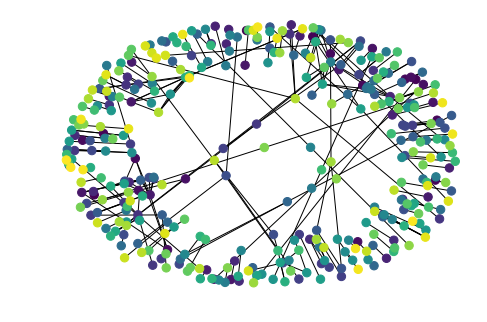

In [37]:
g = nx.DiGraph()

for index, row in edges.iterrows():
    g.add_edge(row['source'], row['target'], weight = row['weight'])

pos = nx.spring_layout(g)

# draw network without node color
nx.draw(g, pos, with_labels=False, node_color=range(0, len(g)), node_size=70, arrows=False)

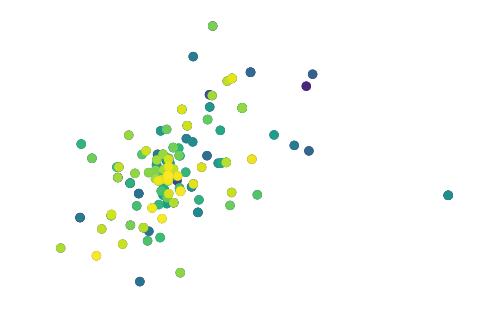

In [38]:
nx.draw_spectral(g, with_labels=False, node_size=70, node_color=range(0, len(g)), arrows=False)

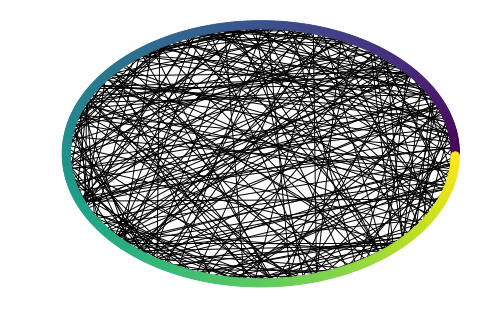

In [39]:
nx.draw_circular(g, with_labels=False, node_size=70, node_color=range(0, len(g)), arrows=False)

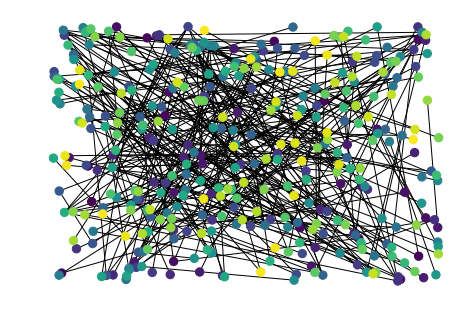

In [40]:
nx.draw_random(g, with_labels=False, node_size=70, node_color=range(0, len(g)), arrows=False)

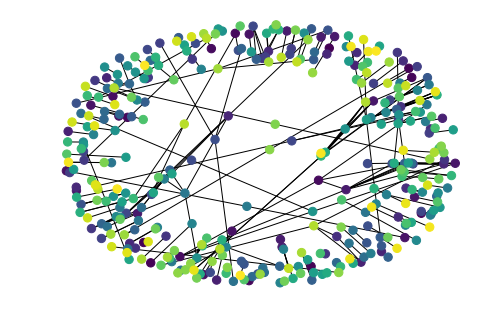

In [41]:
nx.draw_spring(g, with_labels=False, node_size=70, node_color=range(0, len(g)), arrows=False)

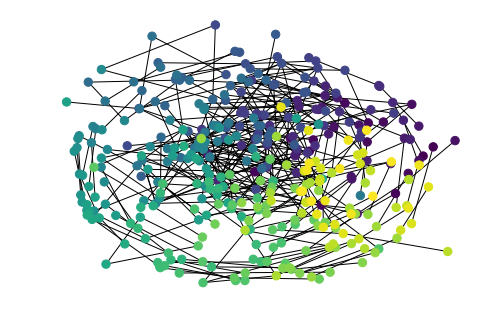

In [42]:
nx.draw_kamada_kawai(g, with_labels=False, node_size=70, node_color=range(0, len(g)), arrows=False)

In [43]:
def get_label_colours(data):
    colours = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    label_colours = {elem: random.sample(colours.items(), int(1))[0][1] for elem in data}
    return label_colours

In [44]:
def get_nodes(df, label):
    texts = list(df.id_1.values) + list(df.id_2.values)
    labels = list(df[label + '_1'].values) + list(df[label + '_2'].values)
    texts_labels = list(zip(texts, labels))
    texts_labels = list(set(texts_labels))

    texts, labels = zip(*texts_labels)

    nodes = pd.DataFrame({'node' : texts,
                          'label' : labels})
    return nodes

In [56]:
def plot_graph(df, label, draw_func, layout_func=None):
    
    edges = pd.DataFrame({'source' : df.id_1.values,
                      'target' : df.id_2.values,
                      'weight' : df.similarity.values})
    
    nodes = get_nodes(df, label)
    g = nx.Graph()

    for index, row in edges.iterrows():
        g.add_edge(row['source'], row['target'], weight = row['weight'])
    
    label_attribute = []
    for index, row in nodes.iterrows():
        label_attribute.append((row['node'], row['label']))

    label_dictionary = dict(label_attribute)

    nx.set_node_attributes(g, label_dictionary, "label")
    
    node_col = []
    
    label_colours_map = get_label_colours(set(nodes['label']))

    for node in g.nodes(data=True):
        label_attr = node[1]['label']
        node_col.append(label_colours_map[label_attr])
    
    if draw_func == nx.draw or draw_func == nx.draw_networkx:
        pos = layout_func(g)
        draw_func(g, pos=pos, node_size=100, with_labels=False, node_color=node_col)
    
    else:
        draw_func(g, with_labels=False, node_size=900, node_color=node_col)
    
    markers = [plt.Line2D([0,0],[0,0],
                          color=color,
                          marker='o',
                          linestyle='') for color in label_colours_map.values()]
    plt.legend(markers, label_colours_map.keys(), numpoints=1, loc='best', bbox_to_anchor=(1.1, 0.3))
    plt.show()
    
    return g

In [46]:
cosine_top = cosine_df[cosine_df['similarity'] > 0.7]

In [47]:
df_traditions = pd.read_pickle('traditions.pkl')

In [48]:
%%time

tfidf_traditions = tfidf_vect.fit_transform(df_traditions.text_pymystem_list)
cosine_matr_traditions = cosine_similarity(tfidf_traditions)

CPU times: user 1.36 s, sys: 47.9 ms, total: 1.41 s
Wall time: 1.44 s


In [49]:
len(cosine_matr_traditions)

10

In [50]:
len(np.where((cosine_matr_traditions > 0.1) & (cosine_matr_traditions < 0.999))[0])

90

In [51]:
cosine_df_traditions = get_df_with_needed_interval(cosine_matr_traditions, 0.1, 0.999)
cosine_df_traditions = cosine_df_traditions.join(df_traditions['tradition'], on='id_1')
cosine_df_traditions = cosine_df_traditions.join(df_traditions['tradition'], on='id_2', rsuffix='_2')
cosine_df_traditions.rename(columns={'tradition': 'tradition_1'}, inplace=True)

In [52]:
cosine_df_traditions = cosine_df_traditions[cosine_df_traditions.id_1 < cosine_df_traditions.id_2]
cosine_df_traditions.sort_values('similarity', ascending=False).head()

,id_1,id_2,similarity,tradition_1,tradition_2
34,3,8,0.901724,Европейская литература,Русская литература
33,3,7,0.894121,Европейская литература,Прочая литература
70,7,8,0.875997,Прочая литература,Русская литература
35,3,9,0.861090,Европейская литература,Скандинавская литература
2,0,3,0.857086,Американская литература,Европейская литература


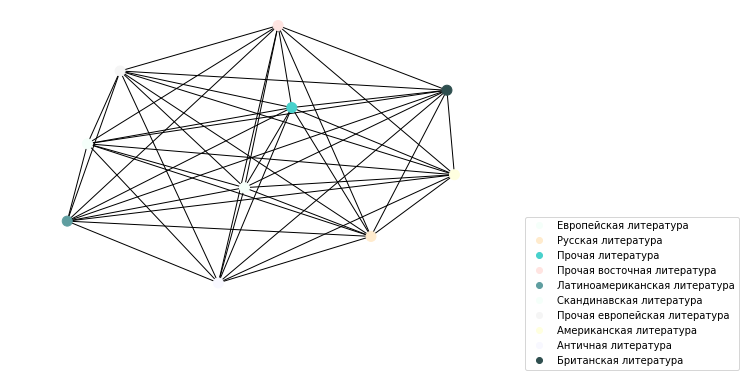

In [53]:
plot_graph(cosine_df_traditions, 'tradition', nx.draw, layout_func=nx.spring_layout)

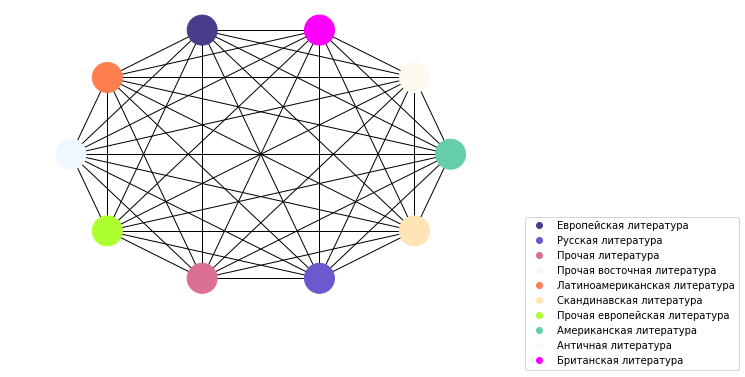

In [57]:
plot_graph(cosine_df_traditions, 'tradition', nx.draw_circular)

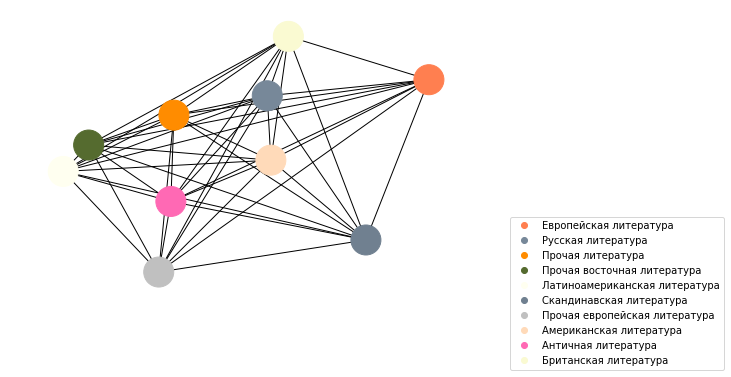

In [58]:
plot_graph(cosine_df_traditions, 'tradition', nx.draw_random)

## Graph Characteristics

In [181]:
g.number_of_nodes()

368

In [182]:
g.number_of_edges()

316

In [ ]:
# nodes sorted by degree

sorted(nx.degree(g), key = lambda x: x[1], reverse = True)

In [ ]:
# the neighbours of the node

for ngh in nx.all_neighbors(g, 12451):
    print(df.iloc[int(ngh)])
    ...
    print('\n')

## Save graph

In [59]:
nx.write_gexf(g, 'cos_graph.gexf')

In [69]:
nx.write_gml(g,'cos_graph_gml')

In [13]:
g = nx.read_gexf('cos_graph.gexf')

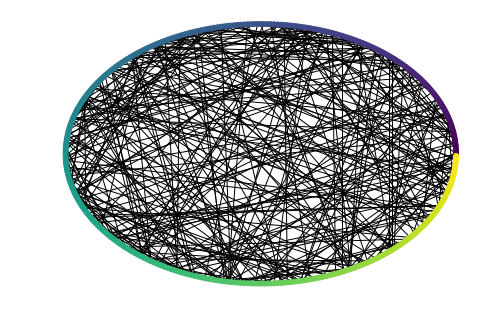

In [186]:
pos = nx.shell_layout(g)
nx.draw(g, pos, with_labels=False, node_size=25, node_color=range(len(g)), arrows = False)

Ещё можно посмотреть:

https://www.quora.com/What-are-the-most-popular-text-similarity-algorithms

1. doc2vec + cosine measure https://code.google.com/archive/p/word2vec/ 
    GloVe + cosine https://nlp.stanford.edu/projects/glove/
   https://github.com/v1shwa/document-similarity
2. Jaccard similarity 
    https://en.wikipedia.org/wiki/Jaccard_index
    https://nickgrattan.wordpress.com/2014/02/18/jaccard-similarity-index-for-measuring-document-similarity/
3. Locality-sensitive hashing  
    https://en.wikipedia.org/wiki/Locality-sensitive_hashing 
    https://github.com/kayzhu/LSHash
    http://www.mmds.org/
4. Cosine Similarity and IDF Modified Cosine Similarity https://www.youtube.com/watch?v=C3Jt14Se9Cg&feature=youtu.be
<br>
* cosine similarity in gensim: https://radimrehurek.com/gensim/similarities/docsim.html
<br>
https://stackoverflow.com/questions/35758612/most-efficient-way-to-construct-similarity-matrix
<br>
https://ematosevic.wordpress.com/2016/08/21/clustering-data-with-similarity-matrix-in-python-tutorial/